# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)


Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
project_data["project_is_approved"].value_counts()

1    42286
0     7714
Name: project_is_approved, dtype: int64

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

### 1.2.8 Univariate Analysis: Cost per project

In [9]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [10]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [11]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

print(project_data)

       Unnamed: 0       id                        teacher_id teacher_prefix  \
0          160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1          140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2           21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3              45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4          172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   
5          141660  p154343  a50a390e8327a95b77b9e495b58b9a6e           Mrs.   
6           21147  p099819  9b40170bfa65e399981717ee8731efc3           Mrs.   
7           94142  p092424  5bfd3d12fae3d2fe88684bbac570c9d2            Ms.   
8          112489  p045029  487448f5226005d08d36bdd75f095b31           Mrs.   
9          158561  p001713  140eeac1885c820ad5592a409a3a8994            Ms.   
10          43184  p040307  363788b51d40d978fe276bcb1f8a2b35           Mrs.   
11         127083  p251806  4ba7c721133ef651ca54a035

[50000 rows x 20 columns]


In [12]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values
print
rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [13]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  
0  My students are English learners that are work...  154.6        23  
1  Our students arrive to our school eager to lea...  299.0         1

In [14]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)



My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
sent = decontracted(project_data['essay'].values[4000])
print(sent)
print("="*50)

I teach language arts and social studies to about 50 students each day.  I teach two groups of amazing kids each day!\r\n\r\nThe students in my classroom range from advanced or gifted learners to students with various learning disabilities. My school is located in an urban environment in Maryland. The school is a Title I (low-income) school, and 99% of the students in the school receive free and reduced price lunch. All students at my school receive free breakfast which is the most important meal of the day!High interest reading supports comprehension and learning. I want to encourage a love of reading by choosing books that interest my third grade students. Many of my students are classified as \"struggling readers\". There is extensive research to support the premise that the best way to become a better reader is to read more. In order for my students to become better or more fluent readers I need to increase both the quantity and quality of their reading.  They need reading material

In [17]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach language arts and social studies to about 50 students each day.  I teach two groups of amazing kids each day!    The students in my classroom range from advanced or gifted learners to students with various learning disabilities. My school is located in an urban environment in Maryland. The school is a Title I (low-income) school, and 99% of the students in the school receive free and reduced price lunch. All students at my school receive free breakfast which is the most important meal of the day!High interest reading supports comprehension and learning. I want to encourage a love of reading by choosing books that interest my third grade students. Many of my students are classified as  struggling readers . There is extensive research to support the premise that the best way to become a better reader is to read more. In order for my students to become better or more fluent readers I need to increase both the quantity and quality of their reading.  They need reading materials that

In [18]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach language arts and social studies to about 50 students each day I teach two groups of amazing kids each day The students in my classroom range from advanced or gifted learners to students with various learning disabilities My school is located in an urban environment in Maryland The school is a Title I low income school and 99 of the students in the school receive free and reduced price lunch All students at my school receive free breakfast which is the most important meal of the day High interest reading supports comprehension and learning I want to encourage a love of reading by choosing books that interest my third grade students Many of my students are classified as struggling readers There is extensive research to support the premise that the best way to become a better reader is to read more In order for my students to become better or more fluent readers I need to increase both the quantity and quality of their reading They need reading materials that they can read and wi

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:18<00:00, 635.47it/s]


In [21]:
# after preprocesing
preprocessed_essays[2000]

project_data['essay']=pd.DataFrame(preprocessed_essays)

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [22]:
# similarly you can preprocess the titles also

# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 13752.97it/s]


In [23]:
preprocessed_titles[2000]

project_data['project_title']=pd.DataFrame(preprocessed_titles)

<b>Computing Sentiments Score</b>

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

categories=list(project_data['essay'].values)


sent_pos=[]
sent_neg=[]
sent_neu=[]
sent_comp=[]


for i in categories:
    sid=SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(i)
    sent_pos.append(ss['pos'])
    sent_neg.append(ss['neg'])
    sent_neu.append(ss['neu'])
    sent_comp.append(ss['compound'])
    
    
project_data['sentiment_pos_essay']=sent_pos
project_data['sentiment_neg_essay']=sent_neg
project_data['sentiment_neu_essay']=sent_neu
project_data['sentiment_compound_essay']=sent_comp

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<b>Number of words in Essays</b>

In [25]:
print(project_data['essay'].values)

['my students english learners working english second third languages we melting pot refugees immigrants native born americans bringing gift language school we 24 languages represented english learner program students every level mastery we also 40 countries represented families within school each student brings wealth knowledge experiences us open eyes new cultures beliefs respect the limits language limits world ludwig wittgenstein our english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills by providing dvd players students able continue mastery english language even no one home able assist all families students within level 1 proficiency status offered part program these educational videos specially chosen english learner teacher sent home regularly watch the videos help child develop early reading skills parents no

In [26]:
import re

essay_lst=list(project_data['essay'].values)
essay_count=[]

for i in essay_lst:
    essay_count.append(len(re.findall(r'\w+', i)))


project_data['number_of_essays']=essay_count

<b>Number of words in Titles</b>

In [27]:
import re

titles_lst=list(project_data['project_title'].values)
titles_count=[]

for i in titles_lst:
    titles_count.append(len(re.findall(r'\w+', i)))


project_data['number_of_titles']=titles_count

## 1. 4 Preparing data for models

In [28]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'sentiment_pos_essay', 'sentiment_neg_essay', 'sentiment_neu_essay',
       'sentiment_compound_essay', 'number_of_essays', 'number_of_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [29]:
grades = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
grades_list = []
for i in grades:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        j = j.replace(' ','_') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('-','_') # we are replacing the & value into 
        temp = temp.replace('Grades','grades') # we are replacing the & value into 
        temp = temp.replace('PreK','prek') # we are replacing the & value into 
    grades_list.append(temp.strip())
    
project_data['project_grade_category'] = grades_list


In [30]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          grades_prek_2   

                               project_title  \
0  educational support english learners home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2        ...         \
0  \"The limits of your language are the limits o...        ...          

  clean_subcategories                                              essay  \
0        ESL Literacy  my students english learners working english s...   

   price  quantity sentiment_pos_essay sentiment_neg_essay  \
0  154.6        23               0.144               0.012   

  sentiment_neu_essay  sentiment_compound_essay  number_of_essays  \
0               0.844                    0.9694               161   

   number_of_titles  
0                 5  

[1 rows x 25 columns]

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [31]:
X=project_data

In [32]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [33]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(22445, 25) (22445,)
(11055, 25) (11055,)
(16500, 25) (16500,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<B>Normalizing the numerical features: Price</B>

In [34]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<B> Normalizing the numerical features: Previously posted projects</B>

In [35]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_ppp_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_ppp_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_ppp_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_ppp_norm.shape, y_train.shape)
print(X_cv_ppp_norm.shape, y_cv.shape)
print(X_test_ppp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<B> Normalizing the numerical features : Quantity</B>

In [36]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))
X_train_qty_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_qty_norm = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_qty_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))
print("After vectorizations")

print(X_train_qty_norm.shape, y_train.shape)
print(X_cv_qty_norm.shape, y_cv.shape)
print(X_test_qty_norm.shape, y_test.shape)

print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<B> Normalizing the numerical features : Sentinment scores for Postives</B>

In [37]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['sentiment_pos_essay'].values)
normalizer.fit(X_train['sentiment_pos_essay'].values.reshape(-1,1))
X_train_sentpos_norm = normalizer.transform(X_train['sentiment_pos_essay'].values.reshape(-1,1))
X_cv_sentpos_norm = normalizer.transform(X_cv['sentiment_pos_essay'].values.reshape(-1,1))
X_test_sentpos_norm = normalizer.transform(X_test['sentiment_pos_essay'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_sentpos_norm.shape, y_train.shape)
print(X_cv_sentpos_norm.shape, y_cv.shape)
print(X_test_sentpos_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<B> Normalizing the numerical features : Sentinment scores for Negatives</B>

In [38]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['sentiment_neg_essay'].values)
normalizer.fit(X_train['sentiment_neg_essay'].values.reshape(-1,1))
X_train_sentneg_norm = normalizer.transform(X_train['sentiment_neg_essay'].values.reshape(-1,1))
X_cv_sentneg_norm = normalizer.transform(X_cv['sentiment_neg_essay'].values.reshape(-1,1))
X_test_sentneg_norm = normalizer.transform(X_test['sentiment_neg_essay'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_sentneg_norm.shape, y_train.shape)
print(X_cv_sentneg_norm.shape, y_cv.shape)
print(X_test_sentneg_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<B> Normalizing the numerical features : Sentinment scores for Neutral</B>

In [39]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['sentiment_neu_essay'].values)
normalizer.fit(X_train['sentiment_neu_essay'].values.reshape(-1,1))
X_train_sentneu_norm = normalizer.transform(X_train['sentiment_neu_essay'].values.reshape(-1,1))
X_cv_sentneu_norm = normalizer.transform(X_cv['sentiment_neu_essay'].values.reshape(-1,1))
X_test_sentneu_norm = normalizer.transform(X_test['sentiment_neu_essay'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_sentneu_norm.shape, y_train.shape)
print(X_cv_sentneu_norm.shape, y_cv.shape)
print(X_test_sentneu_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<B> Normalizing the numerical features : Sentinment scores for Compound</B>

In [40]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['sentiment_compound_essay'].values)
normalizer.fit(X_train['sentiment_compound_essay'].values.reshape(-1,1))
X_train_sentcomp_norm = normalizer.transform(X_train['sentiment_compound_essay'].values.reshape(-1,1))
X_cv_sentcomp_norm = normalizer.transform(X_cv['sentiment_compound_essay'].values.reshape(-1,1))
X_test_sentcomp_norm = normalizer.transform(X_test['sentiment_compound_essay'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_sentcomp_norm.shape, y_train.shape)
print(X_cv_sentcomp_norm.shape, y_cv.shape)
print(X_test_sentcomp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<b>Number of words in the Essay</b>

In [41]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['number_of_essays'].values)
normalizer.fit(X_train['number_of_essays'].values.reshape(-1,1))
X_train_essaynum_norm = normalizer.transform(X_train['number_of_essays'].values.reshape(-1,1))
X_cv_essaynum_norm = normalizer.transform(X_cv['number_of_essays'].values.reshape(-1,1))
X_test_essaynum_norm = normalizer.transform(X_test['number_of_essays'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_essaynum_norm.shape, y_train.shape)
print(X_cv_essaynum_norm.shape, y_cv.shape)
print(X_test_essaynum_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<b>Number of words in the Title</b>

In [42]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['number_of_titles'].values)
normalizer.fit(X_train['number_of_titles'].values.reshape(-1,1))
X_train_titlenum_norm = normalizer.transform(X_train['number_of_titles'].values.reshape(-1,1))
X_cv_titlenum_norm = normalizer.transform(X_cv['number_of_titles'].values.reshape(-1,1))
X_test_titlenum_norm = normalizer.transform(X_test['number_of_titles'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_titlenum_norm.shape, y_train.shape)
print(X_cv_titlenum_norm.shape, y_cv.shape)
print(X_test_titlenum_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<B> One hot encoding the catogorical features: State</B>

In [43]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_state.get_feature_names())
print("="*100)

stateVec=vectorizer_state.get_feature_names()
type(stateVec)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


list

<B> One hot encoding the catogorical features: Project Grade</B>

In [44]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)
print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_grade.get_feature_names())
print("="*100)

projGradeVec=vectorizer_grade.get_feature_names()

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<B> One hot encoding the catogorical features: Teacher Prefix</B>

In [45]:

#replacing nan with empty string
X_train.teacher_prefix=X_train.teacher_prefix.fillna('')
X_cv.teacher_prefix=X_cv.teacher_prefix.fillna('')
X_test.teacher_prefix=X_test.teacher_prefix.fillna('')
uniqueData=X_train['teacher_prefix'].unique()
print(uniqueData)

vectorizer_prefix = CountVectorizer(lowercase=False, binary=True)
vectorizer_prefix.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_prefix.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_prefix.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_prefix.transform(X_test['teacher_prefix'].values)
print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_prefix.get_feature_names())
print("="*100)

prefixteacherVec=vectorizer_prefix.get_feature_names()

['Mrs.' 'Ms.' 'Teacher' 'Mr.']
After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['Mr', 'Mrs', 'Ms', 'Teacher']


<B>One hot encoding the catogorical features: Clean categories</B>

In [46]:
vectorizer_clean = CountVectorizer()
vectorizer_clean.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_ccat_ohe = vectorizer_clean.transform(X_train['clean_categories'].values)
X_cv_ccat_ohe = vectorizer_clean.transform(X_cv['clean_categories'].values)
X_test_ccat_ohe = vectorizer_clean.transform(X_test['clean_categories'].values)
print("After vectorizations")
print(X_train_ccat_ohe.shape, y_train.shape)
print(X_cv_ccat_ohe.shape, y_cv.shape)
print(X_test_ccat_ohe.shape, y_test.shape)
print(vectorizer_clean.get_feature_names())
print("="*100)

cleanCatVec=vectorizer_clean.get_feature_names()

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<B> One hot encoding the catogorical features: Cleab subcategories</B>

In [47]:
vectorizer_subclean = CountVectorizer()
vectorizer_subclean.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_csub_ohe = vectorizer_subclean.transform(X_train['clean_subcategories'].values)
X_cv_csub_ohe = vectorizer_subclean.transform(X_cv['clean_subcategories'].values)
X_test_csub_ohe = vectorizer_subclean.transform(X_test['clean_subcategories'].values)
print("After vectorizations")
print(X_train_csub_ohe.shape, y_train.shape)
print(X_cv_csub_ohe.shape, y_cv.shape)
print(X_test_csub_ohe.shape, y_test.shape)
print(vectorizer_subclean.get_feature_names())
print("="*100)

cleansubCatVec=vectorizer_subclean.get_feature_names()

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h2>2.3 Make Data Model Ready: encoding essay, and project_title</h2>

<B> Bag of Words </B>

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer_bow_title.transform(X_train['project_title'].values)
X_cv_title_bow = vectorizer_bow_title.transform(X_cv['project_title'].values)
X_test_title_bow = vectorizer_bow_title.transform(X_test['project_title'].values)
print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

projTitleBowVec=vectorizer_bow_title.get_feature_names()

After vectorizations
(22445, 1227) (22445,)
(11055, 1227) (11055,)
(16500, 1227) (16500,)


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_bow_essay.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_bow_essay.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_bow_essay.transform(X_test['essay'].values)
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


projEssayBowVec=vectorizer_bow_essay.get_feature_names()

After vectorizations
(22445, 8865) (22445,)
(11055, 8865) (11055,)
(16500, 8865) (16500,)


<b> TFIDF vectorizer </b>

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer_tfidf_title.transform(X_train['project_title'].values)
X_cv_title_tfidf = vectorizer_tfidf_title.transform(X_cv['project_title'].values)
X_test_title_tfidf = vectorizer_tfidf_title.transform(X_test['project_title'].values)
print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

projTitleTfidfVec=vectorizer_tfidf_title.get_feature_names()

After vectorizations
(22445, 1227) (22445,)
(11055, 1227) (11055,)
(16500, 1227) (16500,)


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer_tfidf_essay.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf_essay.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf_essay.transform(X_test['essay'].values)
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


#print(vectorizer.get_feature_names())

projEssayTfidfVec=vectorizer_tfidf_essay.get_feature_names()

After vectorizations
(22445, 8865) (22445,)
(11055, 8865) (11055,)
(16500, 8865) (16500,)


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying SVM on BOW,<font color='red'> SET 1</font>

In [52]:
#merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_qty_norm, X_train_ppp_norm, X_train_price_norm, X_train_state_ohe, X_train_grade_ohe,X_train_teacher_ohe,X_train_ccat_ohe,X_train_csub_ohe,X_train_title_bow,X_train_essay_bow)).tocsr()

X_cr_bow = hstack((X_cv_qty_norm, X_cv_ppp_norm, X_cv_price_norm, X_cv_state_ohe, X_cv_grade_ohe,X_cv_teacher_ohe,
X_cv_ccat_ohe,X_cv_csub_ohe,X_cv_title_bow,X_cv_essay_bow)).tocsr()

X_te_bow = hstack((X_test_qty_norm, X_test_ppp_norm, X_test_price_norm, X_test_state_ohe, X_test_grade_ohe,X_test_teacher_ohe,
X_test_ccat_ohe,X_test_csub_ohe,X_test_title_bow,X_test_essay_bow)).tocsr()
print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 10193) (22445,)
(11055, 10193) (11055,)
(16500, 10193) (16500,)


# GraphViz - Decision Tree

In [53]:
bow_features_names = []

for a in vectorizer_state.get_feature_names() :
    bow_features_names.append(a)

print(len(bow_features_names))

for a in vectorizer_grade.get_feature_names() :
    bow_features_names.append(a)

print(len(bow_features_names))

for a in vectorizer_prefix.get_feature_names() :
    bow_features_names.append(a)

print(len(bow_features_names))

for a in vectorizer_clean.get_feature_names() :
    bow_features_names.append(a)
    
print(len(bow_features_names))

for a in vectorizer_subclean.get_feature_names() :
    bow_features_names.append(a)

print(len(bow_features_names))

for a in vectorizer_bow_essay.get_feature_names() :
    bow_features_names.append(a)
    
print(len(bow_features_names))

for a in vectorizer_bow_title.get_feature_names() :
    bow_features_names.append(a)
    
print(len(bow_features_names))

51
55
59
68
98
8963
10190


In [54]:
bow_features_names.append("price")

bow_features_names.append("teacher_number_of_previously_posted_projects")

bow_features_names.append("quantity")


In [55]:
len(bow_features_names)

10193

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_tr_bow, y_train)

In [58]:
# Visualize data
import graphviz
from sklearn import tree
from graphviz import Source
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=bow_features_names)
graph = graphviz.Source(dot_data)
graph.render("Bow tree",view = True)

'Bow tree.pdf'

In [157]:
from IPython.display import Image
#Image("Bow tree_page-0001.jpg")
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/4jjYDpp.jpg")


# GridSearchCV (K fold Cross Validation)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_tr_bow, y_train)
train_auc_bow= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc_bow = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

In [60]:
train_auc_bow

array([0.54874069, 0.54874069, 0.54874069, 0.54874069, 0.63592269,
       0.63587613, 0.63459441, 0.62850901, 0.74403976, 0.74103169,
       0.71813519, 0.68027919, 0.98124148, 0.97192581, 0.90380867,
       0.7986996 , 0.99574279, 0.99111257, 0.93724947, 0.80984623,
       0.99991143, 0.99834994, 0.95399536, 0.81495549, 0.99991229,
       0.99834351, 0.9544476 , 0.81437822])

In [61]:
cv_auc_bow

array([0.54874006, 0.54874006, 0.54874006, 0.54874006, 0.59816476,
       0.59802256, 0.59835851, 0.59987455, 0.59735608, 0.59441531,
       0.59621818, 0.60246212, 0.55331273, 0.55084899, 0.56831707,
       0.57960223, 0.54044665, 0.54721594, 0.55915897, 0.57695359,
       0.54771044, 0.54299188, 0.55250177, 0.57780519, 0.54603135,
       0.54616789, 0.55458899, 0.57547132])

In [62]:
print(clf.best_params_)

{'max_depth': 10, 'min_samples_split': 500}


In [63]:
depth=[1, 5, 10, 50, 100, 500, 1000]

samples=  [5, 10, 100, 500]

In [64]:
p=0
res = [[0 for x in range(len(samples))] for y in range(len(depth))] 

for i, value1 in enumerate(depth):
    for j, value2 in enumerate(samples):
        res[i][j] =train_auc_bow[p]
        p+=1
        
print(res)

[[0.5487406922217154, 0.5487406922217154, 0.5487406922217154, 0.5487406922217154], [0.6359226925565971, 0.6358761270297626, 0.6345944145720308, 0.6285090063121209], [0.7440397571314279, 0.7410316901633034, 0.7181351877492221, 0.6802791893103305], [0.9812414830695548, 0.971925809442558, 0.9038086734916204, 0.7986995973026456], [0.9957427879442085, 0.9911125706923528, 0.9372494703574707, 0.809846225352915], [0.9999114265971452, 0.9983499420463298, 0.9539953555588034, 0.8149554889543744], [0.9999122862009923, 0.9983435132497853, 0.9544476002403112, 0.8143782188652683]]


Text(0.5, 15.0, 'Min Samples Split')

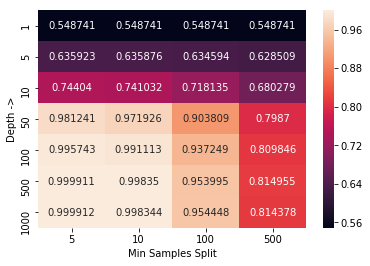

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(res, xticklabels=samples,yticklabels=depth,annot=True, ax = ax,fmt='g');
plt.ylabel('Depth ->')
plt.xlabel('Min Samples Split')

In [66]:
p=0
res = [[0 for x in range(len(samples))] for y in range(len(depth))] 

for i, value1 in enumerate(depth):
    for j, value2 in enumerate(samples):
        res[i][j] =cv_auc_bow[p]
        p+=1
        
print(res)

[[0.5487400577635687, 0.5487400577635687, 0.5487400577635687, 0.5487400577635687], [0.598164756019225, 0.5980225631517949, 0.598358510163597, 0.5998745454879655], [0.5973560808671695, 0.5944153092599588, 0.596218175176886, 0.6024621212062958], [0.5533127265050518, 0.5508489929683957, 0.5683170735579378, 0.5796022293127928], [0.5404466518476125, 0.547215941895201, 0.5591589692735554, 0.5769535855214543], [0.5477104357351315, 0.5429918830366329, 0.5525017708447573, 0.5778051850684923], [0.5460313539409667, 0.5461678918804023, 0.5545889872384362, 0.575471318816746]]


Text(0.5, 15.0, 'Min Samples Split')

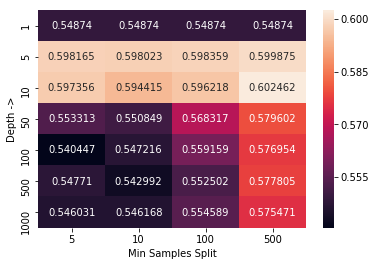

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(res, xticklabels=samples,yticklabels=depth,annot=True, ax = ax,fmt='g');
plt.ylabel('Depth ->')
plt.xlabel('Min Samples Split')

## Observations : 

### 1) Decision Tree with maximum depth between 1 ane 10, performs decently on both Train as well as Cross Validation Data.

### 2) 500 as the value for Minimum samples per split can be considered from above analysis.

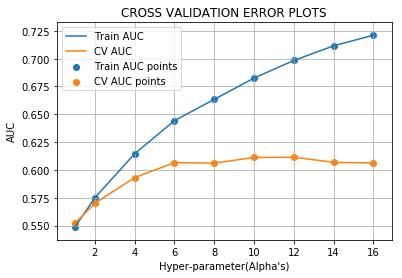

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn import tree
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or no
n-thresholded measure of
decisions (as returned by “decision_function” on some classifiers).
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
depth = [1, 2, 4, 6, 8, 10, 12,14,16]
for i in depth:
    clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth = i, min_samples_split=500)
    clf.fit(X_tr_bow, y_train)
    y_train_pred = clf.predict_proba( X_tr_bow)[:,1]
    y_cv_pred = clf.predict_proba( X_cr_bow)[:,1]
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
plt.plot(depth, train_auc, label='Train AUC')
plt.plot(depth, cv_auc, label='CV AUC')
plt.scatter(depth, train_auc, label='Train AUC points')
plt.scatter(depth, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Hyper-parameter(Alpha's)")
plt.ylabel("AUC")
plt.title("CROSS VALIDATION ERROR PLOTS")
plt.grid()
plt.show()

In [73]:
i=6

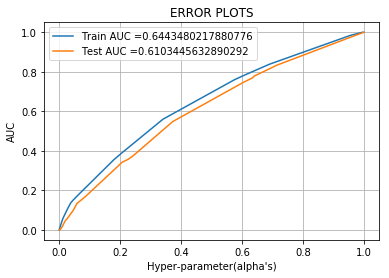

In [74]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn import tree

clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth = i, min_samples_split=500)
clf.fit(X_tr_bow, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = clf.predict_proba(X_tr_bow)[:, 1]
y_test_pred = clf.predict_proba(X_te_bow)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Hyper-parameter(alpha's)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [75]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.36932449006434437 for threshold 0.558


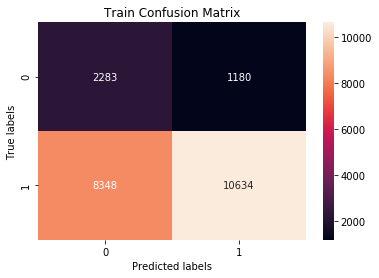

In [76]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


print("Train confusion matrix")
a=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
ax= plt.subplot()
sns.heatmap(a, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train Confusion Matrix'); 



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3438368813881904 for threshold 0.558


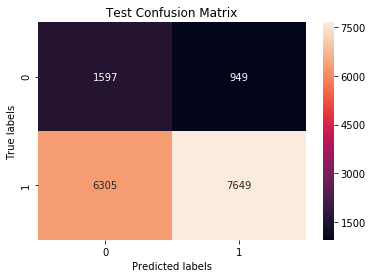

In [77]:
import seaborn as sn
import matplotlib.pyplot as plt

print("Test confusion matrix")
b=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))
ax1= plt.subplot()
sns.heatmap(b, annot=True, ax = ax1,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_title('Test Confusion Matrix');

# `LET US UNDERSTAND WHY OUR MODEL PERFORMS BAD BY ANALYSING THE FALSE POSITIVE POINTS`

# Obtaining the False Positive words from BOW encoded Essays

In [78]:
bow_test_essay=X_test_essay_bow.todense()

In [79]:
vectorizer_bow_essay = CountVectorizer(min_df=10)
vec_bow = vectorizer_bow_essay.fit(X_train["essay"])

In [80]:
bow_features = vec_bow.get_feature_names()
len(bow_features)

8865

In [81]:
y_test_converted = list(y_test[::])

In [82]:
false_positives_index_a = []
fp_count = 0
for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.558:
        false_positives_index_a.append(i)
        fp_count = fp_count + 1
    else :
        continue

100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 485213.60it/s]


In [83]:
fp_count

1931

In [84]:
false_positives_index_a[0:5]

[2, 6, 28, 32, 36]

In [85]:
df1 = pd.DataFrame(bow_test_essay)

In [86]:
df1_final = df1.iloc[false_positives_index_a,:]

In [87]:
df1_final.shape

(1931, 8865)

In [88]:
best_indices = []
for j in range(5000):
    s = df1_final[j].sum()
    if s >= 100 :
        best_indices.append(j)
    else :
        continue

In [89]:
bow_features[0:10]

['00', '000', '10', '100', '1000', '10th', '11', '110', '11th', '12']

In [90]:
fp_words = []
for a in best_indices :
    fp_words.append(str(bow_features[a]))

In [91]:
fp_words

['100',
 '21st',
 'abilities',
 'ability',
 'able',
 'academic',
 'academically',
 'access',
 'achieve',
 'achievement',
 'active',
 'activities',
 'activity',
 'addition',
 'age',
 'all',
 'allow',
 'allowing',
 'allows',
 'already',
 'also',
 'always',
 'amazing',
 'another',
 'area',
 'areas',
 'around',
 'art',
 'arts',
 'as',
 'ask',
 'asking',
 'at',
 'attend',
 'attention',
 'autism',
 'available',
 'back',
 'backgrounds',
 'based',
 'basic',
 'basis',
 'become',
 'begin',
 'behavior',
 'believe',
 'benefit',
 'best',
 'better',
 'beyond',
 'big',
 'book',
 'books',
 'breakfast',
 'bring',
 'build',
 'building',
 'by',
 'cannot',
 'care',
 'career',
 'center',
 'centers',
 'century',
 'chairs',
 'challenge',
 'challenges',
 'challenging',
 'chance',
 'change',
 'child',
 'children',
 'choice',
 'choices',
 'choose',
 'city',
 'class',
 'classes',
 'classroom',
 'classrooms',
 'college',
 'come',
 'comes',
 'comfortable',
 'coming',
 'communication',
 'community',
 'complete',
 '

# Word Cloud for False Positives words

In [92]:
from wordcloud import WordCloud

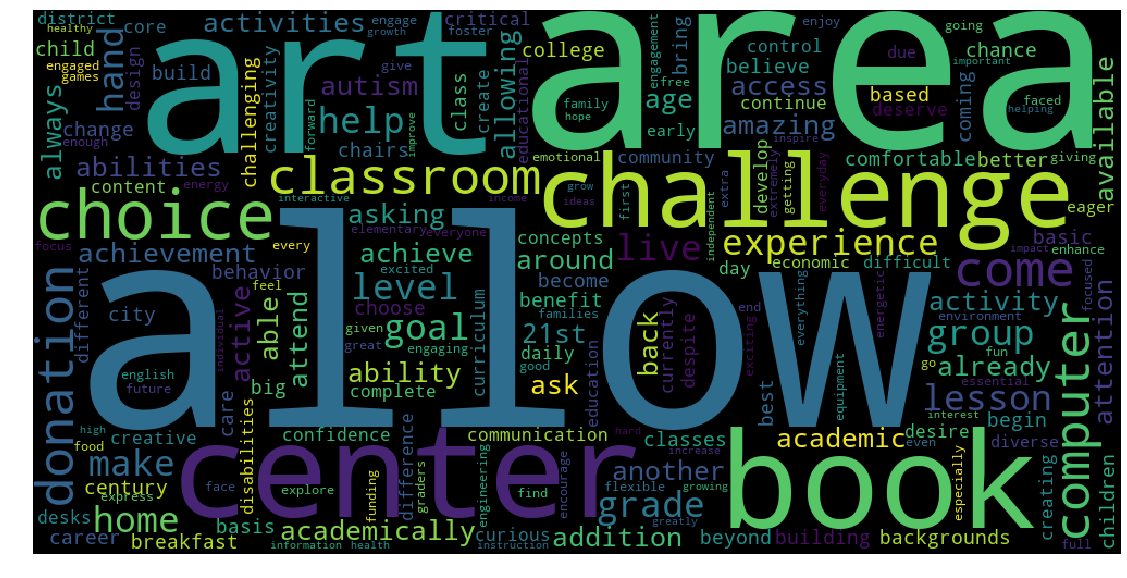

In [93]:
#convert list to string and generate
unique_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

# Box - Plot with the price of these False positive data points

In [94]:
len(false_positives_index_a)

1931

In [95]:
df2 = pd.DataFrame(X_test['price'])

In [96]:
df2_final = df2.iloc[false_positives_index_a,:]

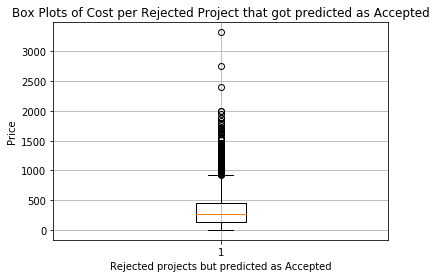

In [97]:
plt.boxplot(df2_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

## Inference 

### 1) Majority of the projects that were rejected but predicted as accepted Costs almost less than 500 Dollars.

### 2) A Few of them are Extremely costs costing more than 3000 Dollars.

# 2.4.2 Applying SVM on TFIDF,<font color='red'> SET 2</font>

In [98]:
#merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_qty_norm, X_train_ppp_norm, X_train_price_norm, X_train_state_ohe, X_train_grade_ohe,X_train_teacher_ohe,
X_train_ccat_ohe,X_train_csub_ohe,X_train_title_tfidf,X_train_essay_tfidf)).tocsr()

X_cr_tfidf = hstack((X_cv_qty_norm, X_cv_ppp_norm, X_cv_price_norm, X_cv_state_ohe, X_cv_grade_ohe,X_cv_teacher_ohe,
X_cv_ccat_ohe,X_cv_csub_ohe,X_cv_title_tfidf,X_cv_essay_tfidf)).tocsr()

X_te_tfidf = hstack((X_test_qty_norm, X_test_ppp_norm, X_test_price_norm, X_test_state_ohe, X_test_grade_ohe,X_test_teacher_ohe,
X_test_ccat_ohe,X_test_csub_ohe,X_test_title_tfidf,X_test_essay_tfidf)).tocsr()
print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 10193) (22445,)
(11055, 10193) (11055,)
(16500, 10193) (16500,)


# GraphViz - Decision Tree

In [99]:
tfidf_features_names = []

for a in vectorizer_state.get_feature_names() :
    tfidf_features_names.append(a)

print(len(tfidf_features_names))

for a in vectorizer_grade.get_feature_names() :
    tfidf_features_names.append(a)

print(len(tfidf_features_names))

for a in vectorizer_prefix.get_feature_names() :
    tfidf_features_names.append(a)

print(len(tfidf_features_names))

for a in vectorizer_clean.get_feature_names() :
    tfidf_features_names.append(a)
    
print(len(tfidf_features_names))

for a in vectorizer_subclean.get_feature_names() :
    tfidf_features_names.append(a)

print(len(tfidf_features_names))

for a in vectorizer_tfidf_essay.get_feature_names() :
    tfidf_features_names.append(a)
    
print(len(tfidf_features_names))

for a in vectorizer_tfidf_title.get_feature_names() :
    tfidf_features_names.append(a)
    
print(len(tfidf_features_names))

51
55
59
68
98
8963
10190


In [100]:
tfidf_features_names.append("price")

tfidf_features_names.append("teacher_number_of_previously_posted_projects")

tfidf_features_names.append("quantity")


In [101]:
len(tfidf_features_names)

10193

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_tr_tfidf, y_train)

In [105]:
# Visualize data
import graphviz
from sklearn import tree
from graphviz import Source
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=tfidf_features_names)
graph = graphviz.Source(dot_data)
graph.render("TFIDF tree",view = True)

'TFIDF tree.pdf'

In [158]:
from IPython.display import Image
#Image("Bow tree_page-0001.jpg")
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/c7jQIRg.jpg")

# GridSearchCV (K fold Cross Validation)

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_tr_tfidf, y_train)
train_auc_tfidf= clf.cv_results_['mean_train_score']

cv_auc_tfidf = clf.cv_results_['mean_test_score']


In [112]:
clf.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [107]:
depth=[1, 5, 10, 50, 100, 500, 1000]

samples=  [5, 10, 100, 500]

In [108]:
p=0
res = [[0 for x in range(len(samples))] for y in range(len(depth))] 

for i, value1 in enumerate(depth):
    for j, value2 in enumerate(samples):
        res[i][j] =train_auc_tfidf[p]
        p+=1
        
print(res)

[[0.5496291956441629, 0.5496291956441629, 0.5496291956441629, 0.5496291956441629], [0.6464852038826885, 0.6462928002045617, 0.6447417270456832, 0.6402989078630995], [0.7550629855287002, 0.7528934932411139, 0.7313214821087928, 0.7024488879597505], [0.9925085027121963, 0.9868037236441678, 0.9269486797039489, 0.8201709884002473], [0.9992125368109883, 0.9975633667311525, 0.9532918863690265, 0.827495174351063], [0.9999633283301945, 0.9988904077273881, 0.9563756402131703, 0.8285240118265985], [0.9999607376172364, 0.9989228241669027, 0.9565908846704273, 0.8292932130454979]]


Text(0.5, 15.0, 'Min Samples Split')

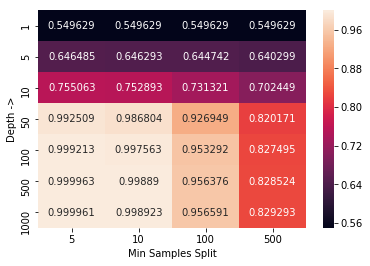

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(res, xticklabels=samples,yticklabels=depth,annot=True, ax = ax,fmt='g');
plt.ylabel('Depth ->')
plt.xlabel('Min Samples Split')

In [110]:
p=0
res = [[0 for x in range(len(samples))] for y in range(len(depth))] 

for i, value1 in enumerate(depth):
    for j, value2 in enumerate(samples):
        res[i][j] =cv_auc_tfidf[p]
        p+=1
        
print(res)

[[0.546099862212307, 0.546099862212307, 0.546099862212307, 0.546099862212307], [0.6080052299261302, 0.6077516823391079, 0.6081034174914978, 0.609087243975394], [0.6073536731177599, 0.6085105181762509, 0.6085433275743266, 0.6122943411058667], [0.5447112786977637, 0.5454468674462515, 0.5672688732011799, 0.5814903426386664], [0.5429635084270313, 0.5497795177997035, 0.5636278332569563, 0.5812134783479503], [0.5448192035192608, 0.5488645502677327, 0.5602082162566865, 0.5821992805860293], [0.5399610809582793, 0.5405596591147176, 0.5574901700204726, 0.5787849451076227]]


Text(0.5, 15.0, 'Min Samples Split')

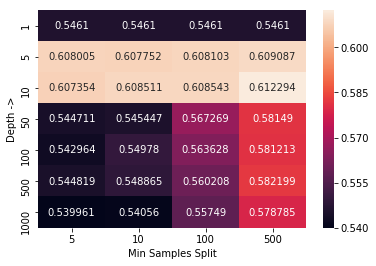

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(res, xticklabels=samples,yticklabels=depth,annot=True, ax = ax,fmt='g');
plt.ylabel('Depth ->')
plt.xlabel('Min Samples Split')

## Observations : 

### 1) Decision Tree with maximum depth between 1 ane 10, performs decently on both Train as well as Cross Validation Data.

### 2) 500 as the value for Minimum samples per split can be considered from above analysis.

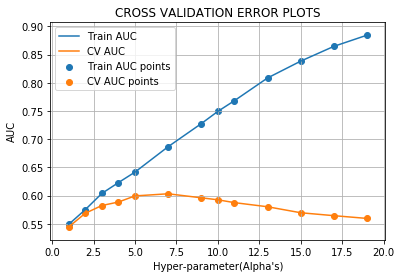

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn import tree
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or no
n-thresholded measure of
decisions (as returned by “decision_function” on some classifiers).
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
depth = [1, 2, 3, 4, 5, 7, 9,10,11,13,15,17,19]
for i in depth:
    clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth = i, min_samples_split=10)
    clf.fit(X_tr_tfidf, y_train)
    y_train_pred = clf.predict_proba( X_tr_tfidf)[:,1]
    y_cv_pred = clf.predict_proba( X_cr_tfidf)[:,1]
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
plt.plot(depth, train_auc, label='Train AUC')
plt.plot(depth, cv_auc, label='CV AUC')
plt.scatter(depth, train_auc, label='Train AUC points')
plt.scatter(depth, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Hyper-parameter(Alpha's)")
plt.ylabel("AUC")
plt.title("CROSS VALIDATION ERROR PLOTS")
plt.grid()
plt.show()

In [120]:
i=5

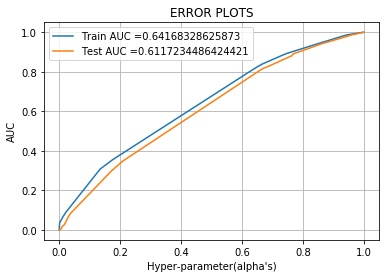

In [121]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn import tree

clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth = i, min_samples_split=10)
clf.fit(X_tr_tfidf, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = clf.predict_proba(X_tr_tfidf)[:, 1]
y_test_pred = clf.predict_proba(X_te_tfidf)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Hyper-parameter(alpha's)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [122]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2934392790555899 for threshold 0.535


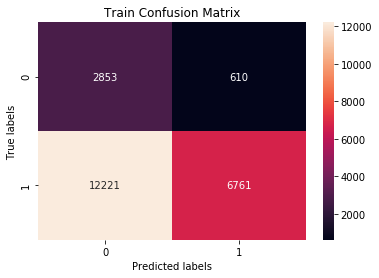

In [123]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
c=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))

ax= plt.subplot()
sns.heatmap(c, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train Confusion Matrix'); 



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.27538716877055697 for threshold 0.535


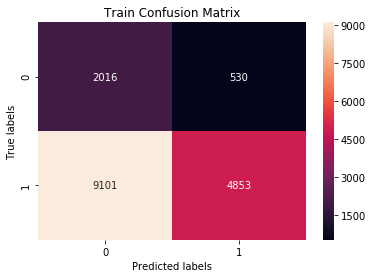

In [124]:
print("Test confusion matrix")
d=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))


ax= plt.subplot()
sns.heatmap(d, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train Confusion Matrix'); 

# `LET US UNDERSTAND WHY OUR MODEL PERFORMS BAD BY ANALYSING THE FALSE POSITIVE POINTS`

In [133]:
tfidf_test = X_test_essay_tfidf.todense()

In [134]:
tfidf_test.shape

(16500, 8865)

In [135]:
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
bv = vectorizer_tfidf_essay.fit(X_train["essay"])

In [136]:
tfidf_features = bv.get_feature_names()
len(tfidf_features)

8865

In [137]:
y_test_converted = list(y_test[::])

In [138]:
false_positives_index_b = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.535:
        false_positives_index_b.append(i)
        fp_count = fp_count + 1 
    else :
        continue

100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 335539.44it/s]


In [139]:
fp_count

2016

In [140]:
false_positives_index_b[0:5]

[2, 6, 28, 32, 36]

In [141]:
df2 = pd.DataFrame(tfidf_test)

In [142]:
df2_final = df2.iloc[false_positives_index_b,:]

In [143]:
df2_final.shape

(2016, 8865)

In [144]:
best_indices_b = []

for j in range(5000):
    
    s = df2_final[j].sum()
    
    if s >= 10 :
        best_indices_b.append(j)
    else :
        continue
        

In [145]:
len(best_indices_b)

199

In [146]:
fp_words_b = []

for a in best_indices_b :
    fp_words_b.append(str(tfidf_features[a]))

In [147]:
fp_words_b = []

for a in best_indices_b :
    fp_words_b.append(str(tfidf_features[a]))

In [148]:
#  Word Cloud for False Positives words

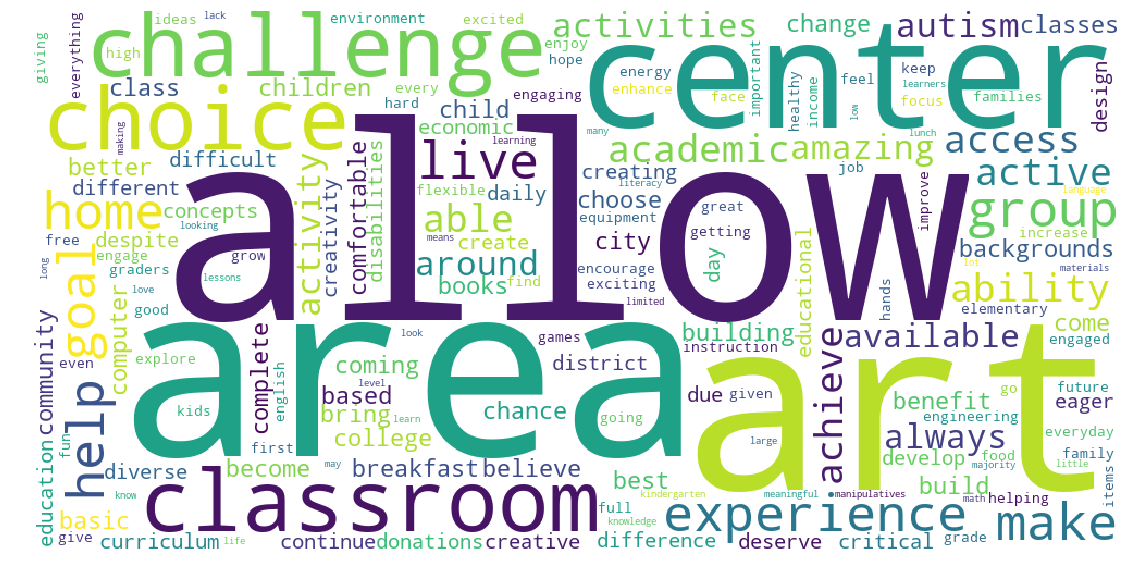

In [149]:
#convert list to string and generate
unique_string=(" ").join(fp_words_b)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# Box - Plot with the price of these False positive data points

In [150]:
df2_b = pd.DataFrame(X_test['price'])

In [151]:
df2_b_final = df2_b.iloc[false_positives_index_b,:]

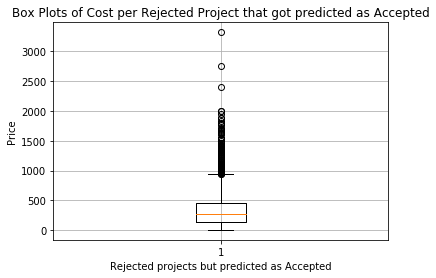

In [152]:
plt.boxplot(df2_b_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

## Observations 

### 1) Majority of the projects that were rejected but predicted as accepted Costs almost less than 500 Dollars.

### 2) A Few of them are Extremely costs costing more than 2000 Dollars.

### 2.4.3 Applying DT on AVG W2V,<font color='red'> SET 3</font>

In [160]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
'''
# ============================

words = []
#for i in preproced_texts:
#    words.extend(i.split(' '))

for i in X_train['project_title']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


Loading Glove Model


1917495it [12:30, 2555.36it/s]


Done. 1917495  words loaded!
all the words in the coupus 97525
the unique words in the coupus 8022
The number of words that are present in both glove vectors and our coupus 7782 ( 97.008 %)
word 2 vec length 7782


In [161]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [162]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train_title.append(vector)

print(len(avg_w2v_train_title))
print(len(avg_w2v_train_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 12878.11it/s]


22445
300


In [163]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
'''
# ============================

words = []
#for i in preproced_texts:
#    words.extend(i.split(' '))

for i in X_cv['project_title']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


Loading Glove Model


1917495it [10:02, 3180.81it/s]


Done. 1917495  words loaded!
all the words in the coupus 48155
the unique words in the coupus 5687
The number of words that are present in both glove vectors and our coupus 5559 ( 97.749 %)
word 2 vec length 5559


In [164]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [165]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_cv_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_cv_title.append(vector)

print(len(avg_w2v_cv_title))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:01<00:00, 10040.36it/s]


11055


In [166]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
'''
# ============================

words = []
#for i in preproced_texts:
#    words.extend(i.split(' '))

for i in X_test['project_title']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


Loading Glove Model


1917495it [12:57, 2467.59it/s]


Done. 1917495  words loaded!
all the words in the coupus 71409
the unique words in the coupus 6977
The number of words that are present in both glove vectors and our coupus 6772 ( 97.062 %)
word 2 vec length 6772


In [167]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [168]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_test_title.append(vector)

print(len(avg_w2v_test_title))
print(len(avg_w2v_test_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:01<00:00, 13334.00it/s]


16500
300


In [169]:

# Similarly you can vectorize for title also

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
'''
# ============================

words = []
#for i in preproced_texts:
#    words.extend(i.split(' '))

for i in X_train['essay']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




Loading Glove Model


1917495it [12:10, 2625.92it/s]


Done. 1917495  words loaded!
all the words in the coupus 3398118
the unique words in the coupus 30470
The number of words that are present in both glove vectors and our coupus 28812 ( 94.559 %)
word 2 vec length 28812


In [170]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [171]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train_essay.append(vector)

print(len(avg_w2v_train_essay))
print(len(avg_w2v_train_essay[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:21<00:00, 1022.85it/s]


22445
300


In [172]:
# Similarly you can vectorize for title also

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
'''
# ============================

words = []
#for i in preproced_texts:
#    words.extend(i.split(' '))

for i in X_cv['essay']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


Loading Glove Model


1917495it [11:42, 2730.44it/s]


Done. 1917495  words loaded!
all the words in the coupus 1670077
the unique words in the coupus 23434
The number of words that are present in both glove vectors and our coupus 22504 ( 96.031 %)
word 2 vec length 22504


In [173]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [174]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_cv_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_cv_essay.append(vector)

print(len(avg_w2v_cv_essay))
print(len(avg_w2v_cv_essay[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:11<00:00, 971.93it/s]


11055
300


In [175]:
# Similarly you can vectorize for title also

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
'''
# ============================

words = []
#for i in preproced_texts:
#    words.extend(i.split(' '))

for i in X_test['essay']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


Loading Glove Model


1917495it [13:08, 2431.40it/s]


Done. 1917495  words loaded!
all the words in the coupus 2493267
the unique words in the coupus 27229
The number of words that are present in both glove vectors and our coupus 25900 ( 95.119 %)
word 2 vec length 25900


In [176]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [177]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_test_essay.append(vector)

print(len(avg_w2v_test_essay))
print(len(avg_w2v_test_essay[0]))

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:16<00:00, 1010.06it/s]


16500
300


In [178]:
#merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_avg_w2v = hstack((X_train_qty_norm.T, X_train_ppp_norm.T, X_train_price_norm.T, X_train_state_ohe, X_train_grade_ohe,X_train_teacher_ohe,
X_train_ccat_ohe,X_train_csub_ohe,avg_w2v_train_title,avg_w2v_train_essay)).tocsr()

X_cv_avg_w2v = hstack((X_cv_qty_norm.T, X_cv_ppp_norm.T, X_cv_price_norm.T, X_cv_state_ohe, X_cv_grade_ohe,X_cv_teacher_ohe,
X_cv_ccat_ohe,X_cv_csub_ohe,avg_w2v_cv_title,avg_w2v_cv_essay)).tocsr()

X_te_avg_w2v = hstack((X_test_qty_norm.T, X_test_ppp_norm.T, X_test_price_norm.T, X_test_state_ohe, X_test_grade_ohe,X_test_teacher_ohe,
X_test_ccat_ohe,X_test_csub_ohe,avg_w2v_test_title,avg_w2v_test_essay)).tocsr()

print("Final Data matrix")
print(X_tr_avg_w2v.shape, y_train.shape)
print(X_cv_avg_w2v.shape, y_cv.shape)
print(X_te_avg_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 701) (22445,)
(11055, 701) (11055,)
(16500, 701) (16500,)


In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_tr_avg_w2v, y_train)
train_auc_avg_w2v= clf.cv_results_['mean_train_score']

cv_auc_avg_w2v = clf.cv_results_['mean_test_score']


In [180]:
train_auc_avg_w2v

array([0.57118602, 0.57118602, 0.57118602, 0.57118602, 0.68947289,
       0.68941844, 0.68862288, 0.68741172, 0.79405228, 0.79137469,
       0.76288106, 0.73590585, 0.99703455, 0.99363646, 0.94237542,
       0.85117218, 0.99954409, 0.99656461, 0.94590435, 0.85574936,
       0.9995437 , 0.99656488, 0.94693908, 0.85390979, 0.9995359 ,
       0.99662028, 0.94654834, 0.85444327])

In [181]:
cv_auc_avg_w2v

array([0.56767377, 0.56767377, 0.56767377, 0.56767377, 0.64580562,
       0.6455958 , 0.6447989 , 0.64450313, 0.59856508, 0.60072908,
       0.62211589, 0.64193214, 0.50398724, 0.5092294 , 0.57048435,
       0.61444959, 0.54297757, 0.54549579, 0.58425604, 0.62160264,
       0.54574315, 0.54582398, 0.57840926, 0.61875934, 0.54354527,
       0.54636903, 0.58356341, 0.61835296])

In [183]:
clf.best_params_

{'max_depth': 5, 'min_samples_split': 5}

In [184]:
depth=[1, 5, 10, 50, 100, 500, 1000]

samples=  [5, 10, 100, 500]

In [185]:
p=0
res = [[0 for x in range(len(samples))] for y in range(len(depth))] 

for i, value1 in enumerate(depth):
    for j, value2 in enumerate(samples):
        res[i][j] =train_auc_avg_w2v[p]
        p+=1
        
print(res)

[[0.5711860159478361, 0.5711860159478361, 0.5711860159478361, 0.5711860159478361], [0.6894728885098924, 0.6894184389515917, 0.6886228842009219, 0.6874117150569259], [0.794052283598353, 0.7913746921960636, 0.7628810554251607, 0.7359058472489979], [0.9970345535844084, 0.9936364562351576, 0.9423754196661337, 0.8511721836980304], [0.9995440898653328, 0.996564605088673, 0.945904345129434, 0.8557493625342125], [0.9995436977148969, 0.9965648751686353, 0.9469390818052548, 0.8539097854574436], [0.9995358966472552, 0.9966202786165705, 0.9465483435635736, 0.8544432730444317]]


Text(0.5, 15.0, 'Min Samples Split')

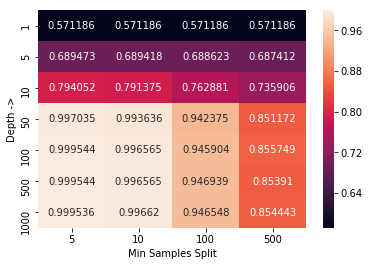

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(res, xticklabels=samples,yticklabels=depth,annot=True, ax = ax,fmt='g');
plt.ylabel('Depth ->')
plt.xlabel('Min Samples Split')

In [187]:
p=0
res = [[0 for x in range(len(samples))] for y in range(len(depth))] 

for i, value1 in enumerate(depth):
    for j, value2 in enumerate(samples):
        res[i][j] =cv_auc_avg_w2v[p]
        p+=1
        
print(res)

[[0.5676737718268385, 0.5676737718268385, 0.5676737718268385, 0.5676737718268385], [0.645805616984862, 0.6455958048600782, 0.6447989003814679, 0.6445031308941184], [0.598565076613451, 0.6007290764397939, 0.6221158905148322, 0.6419321414996204], [0.5039872435746646, 0.5092293983409422, 0.5704843547528884, 0.6144495936869323], [0.5429775678485022, 0.5454957877669285, 0.5842560358933279, 0.6216026395557471], [0.5457431526032458, 0.5458239820335745, 0.5784092642331677, 0.6187593361352076], [0.5435452707512594, 0.5463690285161655, 0.5835634054327219, 0.6183529583142704]]


Text(0.5, 15.0, 'Min Samples Split')

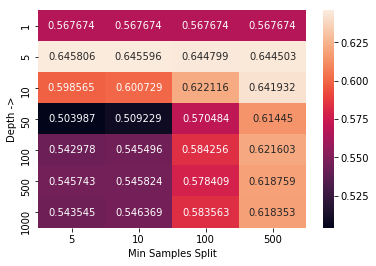

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(res, xticklabels=samples,yticklabels=depth,annot=True, ax = ax,fmt='g');
plt.ylabel('Depth ->')
plt.xlabel('Min Samples Split')

# Observations : 

### 1) Decision Tree with maximum depth between 1 ane 10, performs decently on both Train as well as Cross Validation Data.

### 2) 5 as the value for Minimum samples per split can be considered from above analysis.

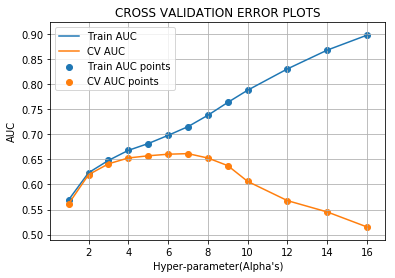

In [189]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn import tree
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or no
n-thresholded measure of
decisions (as returned by “decision_function” on some classifiers).
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
depth = [1, 2, 3, 4, 5, 6, 7,8,9,10,12,14,16]
for i in depth:
    clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth = i, min_samples_split=5)
    clf.fit(X_tr_avg_w2v, y_train)
    y_train_pred = clf.predict_proba( X_tr_avg_w2v)[:,1]
    y_cv_pred = clf.predict_proba( X_cv_avg_w2v)[:,1]
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
plt.plot(depth, train_auc, label='Train AUC')
plt.plot(depth, cv_auc, label='CV AUC')
plt.scatter(depth, train_auc, label='Train AUC points')
plt.scatter(depth, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Hyper-parameter(Alpha's)")
plt.ylabel("AUC")
plt.title("CROSS VALIDATION ERROR PLOTS")
plt.grid()
plt.show()

In [194]:
i=5

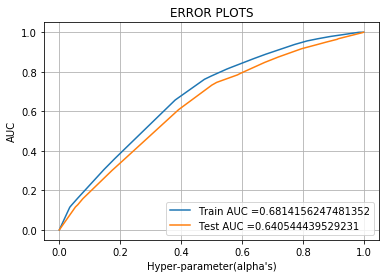

In [195]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn import tree

clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth = i, min_samples_split=5)
clf.fit(X_tr_avg_w2v, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = clf.predict_proba(X_tr_avg_w2v)[:, 1]
y_test_pred = clf.predict_proba(X_te_avg_w2v)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Hyper-parameter(alpha's)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [196]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4069820937403105 for threshold 0.891


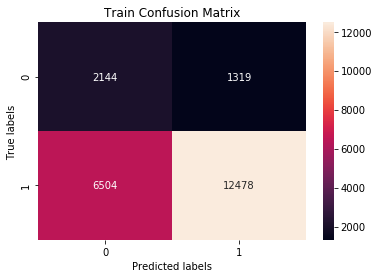

In [197]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
c=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))

ax= plt.subplot()
sns.heatmap(c, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train Confusion Matrix'); 



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3698881106488258 for threshold 0.891


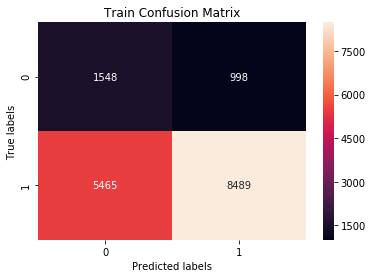

In [198]:
print("Test confusion matrix")
d=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))


ax= plt.subplot()
sns.heatmap(d, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train Confusion Matrix'); 

### 2.4.4 Applying DT on TFIDF W2V,<font color='red'> SET 4</font>

In [205]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [206]:
# average Word2Vec
# compute average word2vec for each review.
X_train_tfidf_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_title.append(vector)

print(len(X_train_tfidf_w2v_title))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:05<00:00, 3805.03it/s]


22445


In [207]:
# average Word2Vec
# compute average word2vec for each review.
X_cv_tfidf_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_title.append(vector)

print(len(X_cv_tfidf_w2v_title))

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:02<00:00, 5347.21it/s]


11055


In [208]:
# average Word2Vec
# compute average word2vec for each review.
X_test_tfidf_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_title.append(vector)

print(len(X_test_tfidf_w2v_title))

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:02<00:00, 6018.83it/s]


16500


In [209]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [210]:
# average Word2Vec
# compute average word2vec for each review.
X_train_tfidf_w2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_essay.append(vector)

print(len(X_train_tfidf_w2v_essay))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [02:25<00:00, 153.82it/s]


22445


In [211]:
# average Word2Vec
# compute average word2vec for each review.
X_cv_tfidf_w2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_essay.append(vector)

print(len(X_cv_tfidf_w2v_essay))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [01:12<00:00, 151.99it/s]


11055


In [212]:
# average Word2Vec
# compute average word2vec for each review.
X_test_tfidf_w2v_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_essay.append(vector)

print(len(X_test_tfidf_w2v_essay))

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:42<00:00, 161.42it/s]


16500


In [213]:
#merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf_w2v = hstack((X_train_qty_norm.T, X_train_ppp_norm.T, X_train_price_norm.T, X_train_state_ohe, X_train_grade_ohe,X_train_teacher_ohe,
X_train_ccat_ohe,X_train_csub_ohe,X_train_tfidf_w2v_essay,X_train_tfidf_w2v_title)).tocsr()

X_cv_tfidf_w2v = hstack((X_cv_qty_norm.T, X_cv_ppp_norm.T, X_cv_price_norm.T, X_cv_state_ohe, X_cv_grade_ohe,X_cv_teacher_ohe,
X_cv_ccat_ohe,X_cv_csub_ohe,X_cv_tfidf_w2v_title,X_cv_tfidf_w2v_essay)).tocsr()

X_te_tfidf_w2v = hstack((X_test_qty_norm.T, X_test_ppp_norm.T, X_test_price_norm.T, X_test_state_ohe, X_test_grade_ohe,X_test_teacher_ohe,
X_test_ccat_ohe,X_test_csub_ohe,X_test_tfidf_w2v_essay,X_test_tfidf_w2v_title)).tocsr()
print("Final Data matrix")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_cv_tfidf_w2v.shape, y_cv.shape)
print(X_te_tfidf_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 701) (22445,)
(11055, 701) (11055,)
(16500, 701) (16500,)


In [214]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_tr_tfidf_w2v, y_train)
train_auc_tfidf_w2v= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc_tfidf_w2v = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']


In [215]:
train_auc_tfidf_w2v

array([0.57118602, 0.57118602, 0.57118602, 0.57118602, 0.69224437,
       0.69215126, 0.69101701, 0.69049586, 0.80613876, 0.80351014,
       0.7768032 , 0.74501147, 0.99944787, 0.996425  , 0.93980641,
       0.82604121, 0.99951328, 0.99674887, 0.93970675, 0.82658929,
       0.99953587, 0.99668922, 0.93961553, 0.8262793 , 0.99953717,
       0.99665559, 0.93879603, 0.82643881])

In [216]:
cv_auc_tfidf_w2v

array([0.56767377, 0.56767377, 0.56767377, 0.56767377, 0.64307799,
       0.64316131, 0.64188981, 0.64206951, 0.60673733, 0.6082717 ,
       0.62024594, 0.63389353, 0.53559784, 0.53755505, 0.57167492,
       0.61674339, 0.54071745, 0.54355044, 0.5728732 , 0.61783062,
       0.53627056, 0.54465096, 0.5738918 , 0.61436699, 0.54192105,
       0.54768161, 0.57398795, 0.6153287 ])

In [223]:
clf.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [217]:
depth=[1, 5, 10, 50, 100, 500, 1000]

samples=  [5, 10, 100, 500]

In [218]:
p=0
res = [[0 for x in range(len(samples))] for y in range(len(depth))] 

for i, value1 in enumerate(depth):
    for j, value2 in enumerate(samples):
        res[i][j] =train_auc_tfidf_w2v[p]
        p+=1
        
print(res)

[[0.5711860159478361, 0.5711860159478361, 0.5711860159478361, 0.5711860159478361], [0.6922443720616237, 0.6921512557077896, 0.6910170111785687, 0.6904958577660912], [0.8061387625739969, 0.8035101397542551, 0.7768032030491143, 0.7450114654278256], [0.9994478659236327, 0.996424998291843, 0.9398064087737596, 0.8260412142828208], [0.999513278463878, 0.9967488692243652, 0.9397067460463641, 0.8265892925864478], [0.9995358697807205, 0.996689223255478, 0.9396155261230337, 0.8262793048446314], [0.9995371682334643, 0.9966555949084391, 0.9387960278119329, 0.8264388076618575]]


Text(0.5, 15.0, 'Min Samples Split')

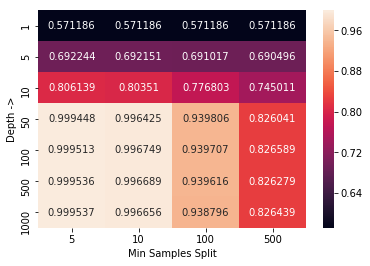

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(res, xticklabels=samples,yticklabels=depth,annot=True, ax = ax,fmt='g');
plt.ylabel('Depth ->')
plt.xlabel('Min Samples Split')

In [220]:
p=0
res = [[0 for x in range(len(samples))] for y in range(len(depth))] 

for i, value1 in enumerate(depth):
    for j, value2 in enumerate(samples):
        res[i][j] =cv_auc_tfidf_w2v[p]
        p+=1
        
print(res)

[[0.5676737718268385, 0.5676737718268385, 0.5676737718268385, 0.5676737718268385], [0.6430779879956529, 0.6431613145676998, 0.6418898132671146, 0.6420695120996052], [0.6067373302300797, 0.608271702437401, 0.6202459357381045, 0.6338935328584684], [0.5355978442031306, 0.5375550536220466, 0.57167491731111, 0.6167433866269295], [0.5407174543396159, 0.5435504370499181, 0.5728732006619889, 0.6178306238612611], [0.5362705630043444, 0.544650962466531, 0.5738917950356841, 0.614366992586569], [0.5419210466442772, 0.5476816138846999, 0.5739879483794785, 0.6153287009737284]]


Text(0.5, 15.0, 'Min Samples Split')

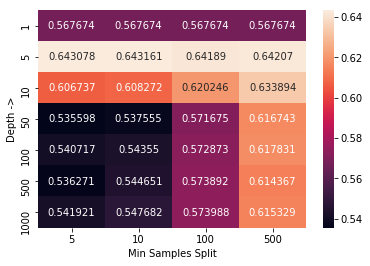

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(res, xticklabels=samples,yticklabels=depth,annot=True, ax = ax,fmt='g');
plt.ylabel('Depth ->')
plt.xlabel('Min Samples Split')

## Observations : 

### 1) Decision Tree with maximum depth between 1 ane 10, performs decently on both Train as well as Cross Validation Data.

### 2) 10 as the value for Minimum samples per split can be considered from above analysis.

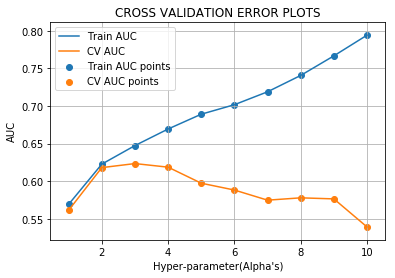

In [224]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn import tree
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or no
n-thresholded measure of
decisions (as returned by “decision_function” on some classifiers).
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
depth = [1, 2, 3, 4, 5, 6, 7,8,9,10]
for i in depth:
    clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth = i, min_samples_split=5)
    clf.fit(X_tr_tfidf_w2v, y_train)
    y_train_pred = clf.predict_proba( X_tr_tfidf_w2v)[:,1]
    y_cv_pred = clf.predict_proba( X_cv_tfidf_w2v)[:,1]
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
plt.plot(depth, train_auc, label='Train AUC')
plt.plot(depth, cv_auc, label='CV AUC')
plt.scatter(depth, train_auc, label='Train AUC points')
plt.scatter(depth, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Hyper-parameter(Alpha's)")
plt.ylabel("AUC")
plt.title("CROSS VALIDATION ERROR PLOTS")
plt.grid()
plt.show()

In [225]:
i=3

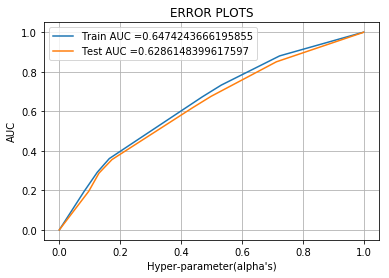

In [226]:
#https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn import tree

clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth = i, min_samples_split=10)
clf.fit(X_tr_tfidf_w2v, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = clf.predict_proba(X_tr_tfidf_w2v)[:, 1]
y_test_pred = clf.predict_proba(X_te_tfidf_w2v)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Hyper-parameter(alpha's)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [227]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.35695018211547613 for threshold 0.849


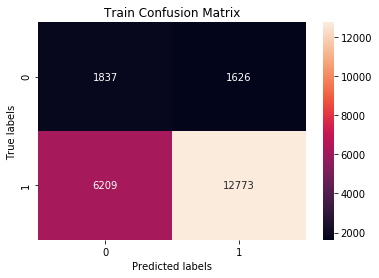

In [228]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
c=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))

ax= plt.subplot()
sns.heatmap(c, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train Confusion Matrix'); 



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.34740944350762654 for threshold 0.849


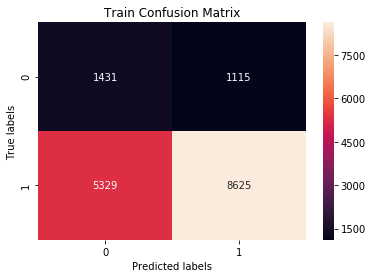

In [229]:
print("Test confusion matrix")
d=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))


ax= plt.subplot()
sns.heatmap(d, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train Confusion Matrix'); 

# [Task 2] Select best 5k features from Set 2

In [56]:
#merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_qty_norm.T, X_train_ppp_norm.T, X_train_price_norm.T, X_train_state_ohe, X_train_grade_ohe,X_train_teacher_ohe,
X_train_ccat_ohe,X_train_csub_ohe,X_train_title_tfidf,X_train_essay_tfidf)).tocsr()

X_cr_tfidf = hstack((X_cv_qty_norm.T, X_cv_ppp_norm.T, X_cv_price_norm.T, X_cv_state_ohe, X_cv_grade_ohe,X_cv_teacher_ohe,
X_cv_ccat_ohe,X_cv_csub_ohe,X_cv_title_tfidf,X_cv_essay_tfidf)).tocsr()

X_te_tfidf = hstack((X_test_qty_norm.T, X_test_ppp_norm.T, X_test_price_norm.T, X_test_state_ohe, X_test_grade_ohe,X_test_teacher_ohe,
X_test_ccat_ohe,X_test_csub_ohe,X_test_title_tfidf,X_test_essay_tfidf)).tocsr()
print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 6324) (22445,)
(11055, 6324) (11055,)
(16500, 6324) (16500,)


In [108]:
## Fit the Model to obtain the best 5k features

from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_tr_tfidf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
## Compute the Feature importances for our Train Features
a=model.tree_.compute_feature_importances(normalize=False)

In [110]:
df9 = pd.DataFrame(a)
df9 = np.transpose(df9)

In [111]:
## Store the indexes of the features with atleast some importance. Lets ignore the features with 0
## as the feature importance value and instead consider all the values other than these
best_ind = []
for j in range(6324):
    s = df9[j].sum()
    if s > 0 :
        best_ind.append(j)
    else :
        continue

In [112]:
## Identify number of Features after feature importance step
len(best_ind)

1563

# While calculating the feature importances of every Column using the DecisionTrees classifier, we hardly get 1563 columns with some importance. The remaining columns of the the total 6234 columns contribute 0 importance.

In [113]:
a = X_tr_tfidf.todense()

In [114]:
set5_train = pd.DataFrame(a)

In [115]:
final_df_train = set5_train.iloc[:, best_ind]

In [116]:
final_df_train.shape

(22445, 1563)

In [117]:
b = X_te_tfidf.todense()

In [118]:
b.shape

(16500, 6324)

In [119]:
set5_test = pd.DataFrame(b)

In [120]:
final_df_test = set5_test.iloc[:, best_ind]

In [121]:
c=X_te_tfidf.todense()

In [122]:
c.shape

(16500, 6324)

In [123]:
set5_cv = pd.DataFrame(c)

In [124]:
final_df_cv = set5_cv.iloc[:, best_ind]

In [125]:
final_df_cv.shape

(16500, 1563)

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


sv = SGDClassifier(class_weight = 'balanced',loss='hinge', penalty='l2')

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc')
clf.fit(final_df_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

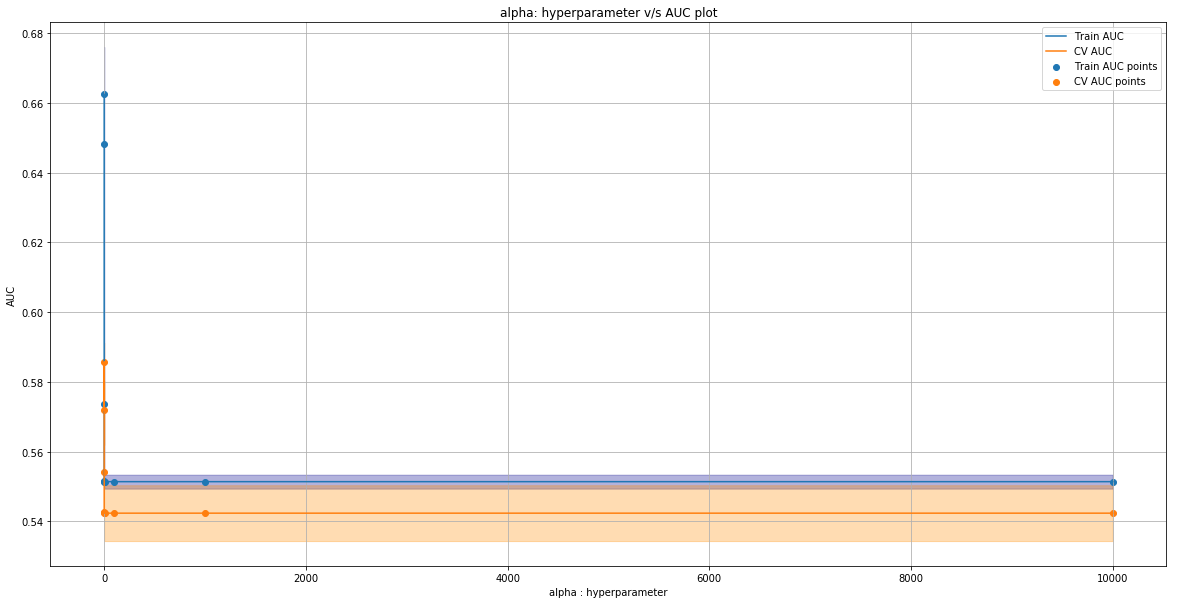

In [141]:
plt.figure(figsize=(20,10))
plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc +
train_auc_std,alpha=0.3,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color=
'darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

In [142]:
from sklearn.linear_model import SGDClassifier
sv = SGDClassifier(class_weight = 'balanced',loss='hinge', penalty='l2')
parameters = {'alpha':[0.01, 0.05, 0.1, 0.5, 0.9, 1.5, 2.0]}
clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc')
clf.fit(final_df, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

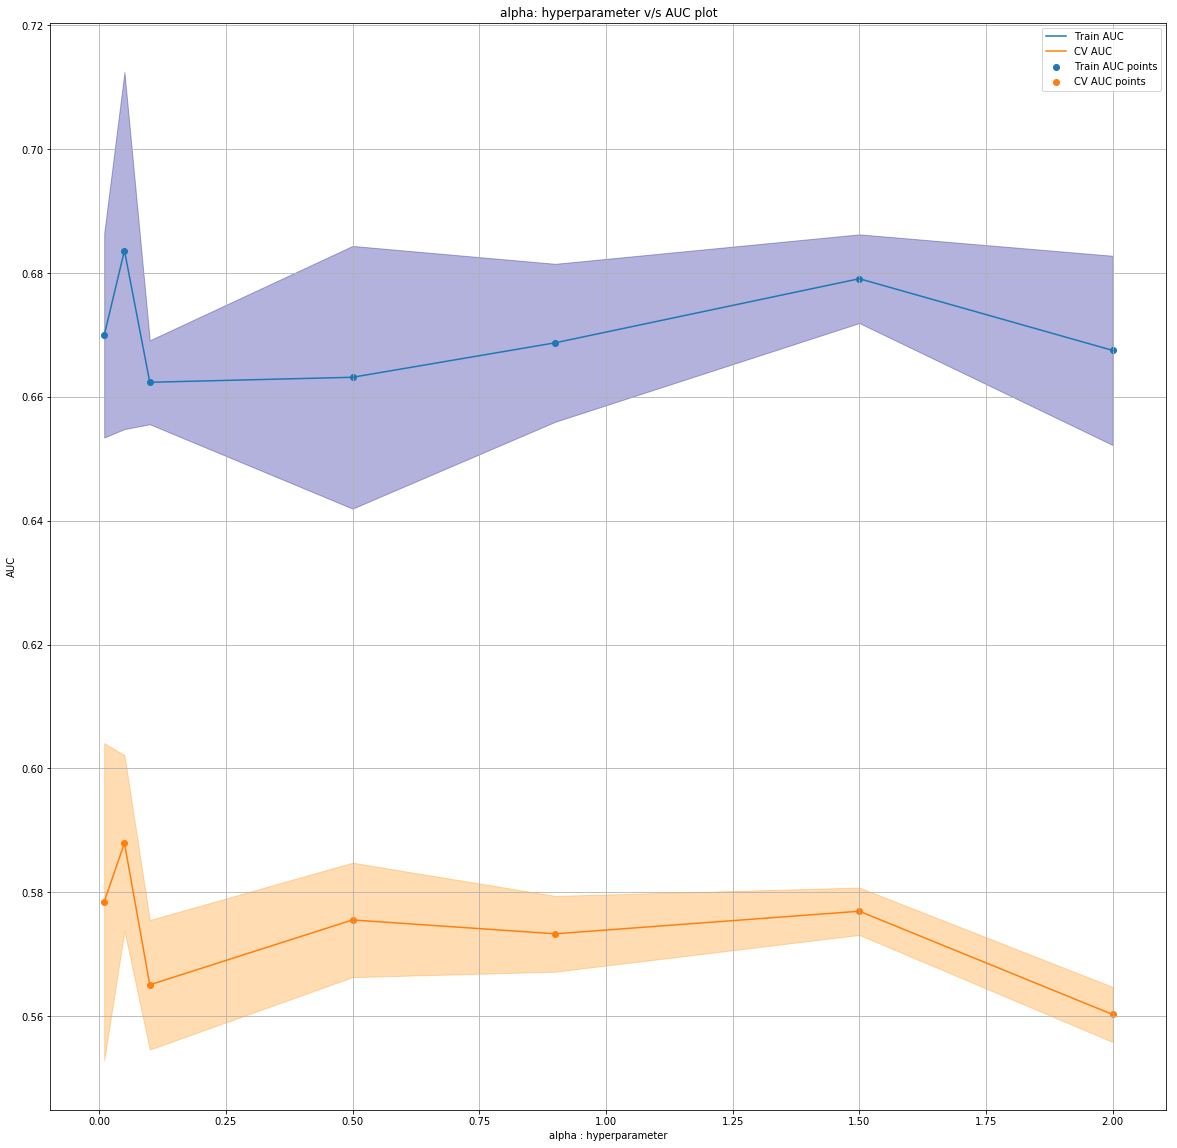

In [143]:
plt.figure(figsize=(20,20))
plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc +
train_auc_std,alpha=0.3,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color=
'darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

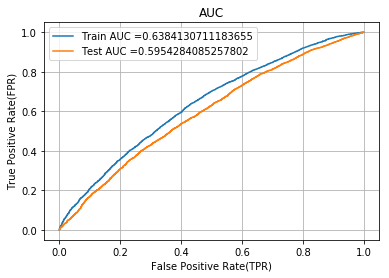

In [149]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
model = SGDClassifier(class_weight = 'balanced',loss='hinge', penalty='l2', alpha=0.125)
model.fit(final_df_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positiveclass
# not the predicted outputs
y_train_pred = model.decision_function(final_df_train)
y_test_pred = model.decision_function(final_df_test)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix

In [151]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
   # print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix


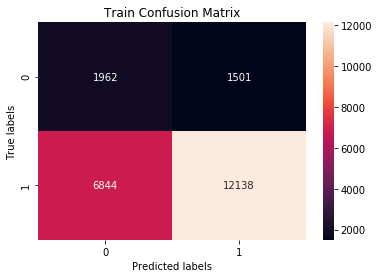

In [152]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


print("Train confusion matrix")
a=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
ax= plt.subplot()
sns.heatmap(a, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train Confusion Matrix'); 



Test confusion matrix


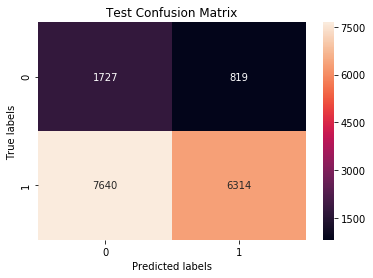

In [153]:
import seaborn as sn
import matplotlib.pyplot as plt

print("Test confusion matrix")
b=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))
ax1= plt.subplot()
sns.heatmap(b, annot=True, ax = ax1,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_title('Test Confusion Matrix');

# <h1>3. Conclusion</h1>

In [161]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(max depth,min samples split)", "AUC"]

x.add_row(["BOW", "Decision Trees","(5, 500)", 0.611])
x.add_row(["TFIDF", "Decision Trees", "(6, 500)", 0.612])
x.add_row(["AVG W2V", "Decision Trees", "(5, 5)", 0.643])
x.add_row(["TFIDF W2V", "Decision Trees", "(3, 10)", 0.620])
x.add_row(["TFIDF-5k Features", "Linear SVM", "alpha = 0.125", 0.596])


print(x)

+-------------------+----------------+----------------------------------------------+-------+
|     Vectorizer    |     Model      | Hyperparameters(max depth,min samples split) |  AUC  |
+-------------------+----------------+----------------------------------------------+-------+
|        BOW        | Decision Trees |                   (5, 500)                   | 0.611 |
|       TFIDF       | Decision Trees |                   (6, 500)                   | 0.612 |
|      AVG W2V      | Decision Trees |                    (5, 5)                    | 0.643 |
|     TFIDF W2V     | Decision Trees |                   (3, 10)                    |  0.62 |
| TFIDF-5k Features |   Linear SVM   |                alpha = 0.125                 | 0.596 |
+-------------------+----------------+----------------------------------------------+-------+
